Network X Code goes here, now we convert it into a graph

Debug: Added Node ATLAM5 - x: -84.3833, y: 33.75
Debug: Added Node ATLAng - x: -85.5, y: 34.5
Debug: Added Node CHINng - x: -87.6167, y: 41.8333
Debug: Added Node DNVRng - x: -105.0, y: 40.75
Debug: Added Node HSTNng - x: -95.517364, y: 29.770031
Debug: Added Node IPLSng - x: -86.159535, y: 39.780622
Debug: Added Node KSCYng - x: -96.596704, y: 38.961694
Debug: Added Node LOSAng - x: -118.25, y: 34.05
Debug: Added Node NYCMng - x: -73.9667, y: 40.7833
Debug: Added Node SNVAng - x: -122.02553, y: 37.38575
Debug: Added Node STTLng - x: -122.3, y: 47.6
Debug: Added Node WASHng - x: -77.026842, y: 38.897303
Debug: Processing link 1 - Source: ATLAng, Destination: ATLAM5
Link ID: 1, Source: ATLAng, Destination: ATLAM5, Capacity: 40000.0, Cost: 133.0
Debug: Processing link 2 - Source: HSTNng, Destination: ATLAng
Link ID: 2, Source: HSTNng, Destination: ATLAng, Capacity: 40000.0, Cost: 1081.0
Debug: Processing link 3 - Source: IPLSng, Destination: ATLAng
Link ID: 3, Source: IPLSng, Destination

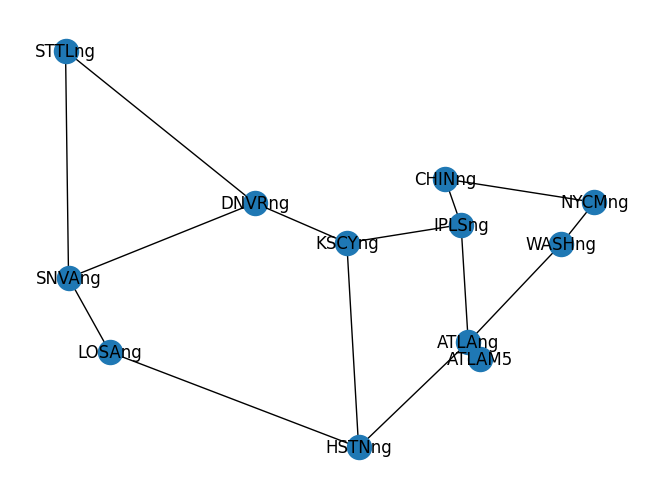

In [1]:
#Parameters:
NoOfUsers = 50



# Importing required libraries
import random
import networkx as nx   # for creating and manipulating graphs
import matplotlib.pyplot as plt   # for visualizing graphs

# Importing required functions
import PerformanceAnalysis.MeasureStatistics as MeasureStatistics  # to measure network statistics
import SearchAlgos.PageRank as  PageRank  # to compute node rankings based on pagerank

# Importing a user-defined function to read network data from XML file
from Import_NetworkFromXML_backup import *



# Defining a function to convert nodes in the XML network dictionary to nodes in networkx graph
def convert_nodes(G, nodes):
    for node in nodes:
        node_id = nodes[node].get("id")
        x_cor = nodes[node].get("x_cor")
        y_cor = nodes[node].get("y_cor")
        G.add_node(node_id, pos=(x_cor, y_cor))
        print(f"Debug: Added Node {node_id} - x: {x_cor}, y: {y_cor}")  # Debug print



#Function to convert links in the XML network dictionary to edges in NetworkX graph

def convert_links(G, nodes, links):
    for link_id, link in enumerate(links.keys(), 1):
        source = links[link].get("source")
        dest = links[link].get("destination")
        
        print(f"Debug: Processing link {link_id} - Source: {source}, Destination: {dest}")  # Debug print

        additionalModules = links[link].get('additionalModules')
        
        if additionalModules:
            addModule = additionalModules.get('addModule')
            if addModule:
                capacity = addModule.get("capacity")
                cost = addModule.get("cost")
                G.add_edge(source, dest, capacity=float(capacity), cost=float(cost))
                print(f"Link ID: {link_id}, Source: {source}, Destination: {dest}, Capacity: {capacity}, Cost: {cost}")
            else:
                print(f"Link ID: {link_id} has no 'addModule' in 'additionalModules'.")
        else:
            print(f"Link ID: {link_id} has no additional modules.")

# Defining the name of the network and creating an empty networkx graph
network_name = "abilene.xml"
G = nx.Graph()

# Defining the path to the network XML file and reading the network data from the file
path = 'Networks/'
from_xml = read_XMLnetwork (path+network_name)

# Extracting nodes, links, and demands data from the network data dictionary
nodes = from_xml[0]
links = from_xml[1]


# Converting nodes and links data to nodes and edges in networkx graph
convert_nodes(G,nodes)
convert_links(G,nodes,links)


# Drawing the networkx graph with node positions and other attributes
nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, node_size=300, style = "solid")

print(G)




# Measure Infrastructure Statistics

In [2]:
# Calculating shortest paths between all pairs of nodes in the networkx graph
sp = dict(nx.all_pairs_shortest_path(G))

# calling the measure_statistics function and passing the networkx graph G as a parameter
MeasureStatistics.topology_statistics(G)

# calling the assortativity_measure function and passing the networkx graph G as a parameter
MeasureStatistics.assortativity_measure(G)

pagerank_df = PageRank.compute_pagerank(G)
print("Page Rank Weights")
print(pagerank_df)

Topology Stats:
Density: 0.22727272727272727
Avg. shortest path length: 2.5
Avg. clustering coefficient: 0.13888888888888887
Assortativity -0.2605042016806722

Assortativity Stats:
12
0.2097902097902098
Erdos-Renyi assortativity: -0.299240598987105 0.1593645833875349
Conf. model assortativity: 0.03720962059373564 0.16723145398106923
Real network value: -0.2605042016806722

Page Rank Weights
      name     value
1   ATLAng  0.132220
5   IPLSng  0.097529
9   SNVAng  0.095919
4   HSTNng  0.095611
3   DNVRng  0.094565
6   KSCYng  0.094016
8   NYCMng  0.073284
11  WASHng  0.071743
2   CHINng  0.071279
7   LOSAng  0.066766
10  STTLng  0.066470
0   ATLAM5  0.040597


# Approximations and Heuristics
Approximations of graph properties and Heuristic methods for optimization.

# import
These functions can be accessed using networkx.approximation.function_name

They can be imported using from networkx.algorithms import approximation or from networkx.algorithms.approximation import function_name

# Treewidth
Functions for computing treewidth decomposition.

Treewidth of an undirected graph is a number associated with the graph. It can be defined as the size of the largest vertex set (bag) in a tree decomposition of the graph minus one.

Wikipedia: Treewidth

treewidth_min_degree(G): Returns a treewidth decomposition using the Minimum Degree heuristic.

## To Implement:
1. Generate Users: Randomly distrubuted users generated with uniform random distrubution of (x,y) corrdinates around the graph G that represents infrastrcuture. Allow options (ex. User_Spread).
2. Connect each user to nearest AP: Allow options (ex. SNR, Connected_Users, Access_Technology).
3. Generate demand for each user: Assign User -> Application (Define SFCn = {VNF1 + VNF2 + .... + VNFx}).
4. Create Placement Algorithm for each Placement Solution.
5. Create a Next Candidate Search Algorithm: Takes as an input (G, Users, Demamds).
6. Measure network statistics for each Placement Algorithm.
7. Generate logs for each Placement Algorithm.
8. Save logs in an output file.
9. Create function to plot from the logs.

## Generate Users
Here we will generate users

Generate Users: Randomly distrubuted users generated with uniform random distrubution of (x,y) corrdinates around the graph G that represents infrastrcuture. 

Allow options (ex. User_Spread).

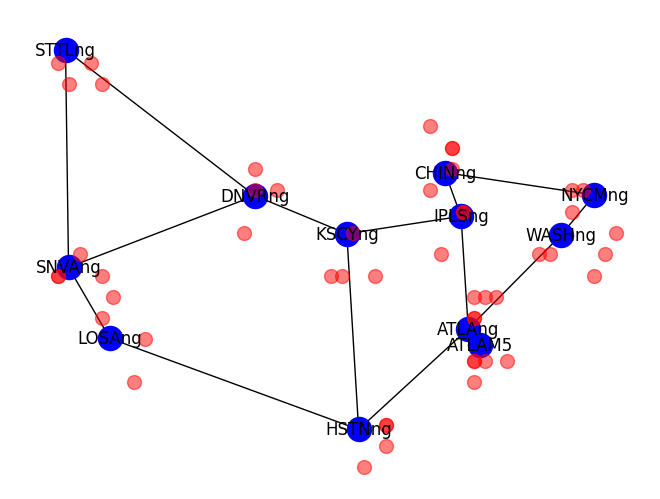

In [3]:
#users

# (1) Create a new graph, G_users, to represent the users.
G_users = nx.Graph()

# (2, 3) Modify the create_users function to add user nodes to G_users and add NoOfUsers parameter
def create_users(G, G_users, nodes, NoOfUsers):
    user_count = 0
    while user_count < NoOfUsers:
        for node in nodes:
            node_id = nodes[node].get("id")
            x_cor = nodes[node].get("x_cor")
            y_cor = nodes[node].get("y_cor")

            # Use random.uniform() instead of random.randint() and convert the result to an integer
            randx = int(random.uniform(x_cor - 2.5, x_cor + 2.5))
            randy = int(random.uniform(y_cor - 2.5, y_cor + 2.5))

            user_id = "user_" + str(user_count)
            G_users.add_node(user_id, pos=(randx, randy))
            user_count += 1

            if user_count >= NoOfUsers:
                break


# (5) Call the create_users function with the desired number of users

create_users(G, G_users, nodes, NoOfUsers)

# Draw the original graph G and the graph of users G_users together
pos_G = nx.get_node_attributes(G, 'pos')
pos_G_users = nx.get_node_attributes(G_users, 'pos')

nx.draw(G, pos_G, with_labels=True, node_size=300, style="solid", node_color="blue")
nx.draw(G_users, pos_G_users, with_labels=False, node_size=100, style="dashed", node_color="red", alpha=0.5)

plt.show()

# Add Edge Device Attributes


In [4]:
# (1) Import the json module
import json

# (2) Load the JSON data from the EdgeDevices.json file
with open("Devices/EdgeDevices.json", "r") as file:
    edge_devices_data = json.load(file)

# (3) Create a function to associate edge devices with their attributes
def associate_edge_devices(G, edge_devices_data):
    edge_devices = edge_devices_data["edgeDevices"]
    edge_servers = edge_devices_data["edgeServers"]

    for node in G.nodes():
        device = random.choice(edge_devices + edge_servers)
        G.nodes[node]["name"] = device["name"]
        G.nodes[node]["formFactor"] = device["formFactor"]
        G.nodes[node]["architecture"] = device["architecture"]
        G.nodes[node]["cpu"] = device["cpu"]
        G.nodes[node]["memory"] = device["memory"]
        G.nodes[node]["storage"] = device["storage"]
        G.nodes[node]["source"] = device["source"]

# (4) Call the function to update the attributes of the edge devices in the graph
associate_edge_devices(G, edge_devices_data)

#Debug to print
for node, attrs in G.nodes(data=True):
    print(f"Node: {node}")
    for attr_key, attr_value in attrs.items():
        print(f"  {attr_key}: {attr_value}")
    print()


Node: ATLAM5
  pos: (-84.3833, 33.75)
  name: Rigardo Cascade 500 Gateway
  formFactor: 484
  architecture: ARMv7
  cpu: 1x800MHz
  memory: 512MB
  storage: 8GB
  source: Edge_Device_Cascade500

Node: ATLAng
  pos: (-85.5, 34.5)
  name: Dell Edge Gateway 5000
  formFactor: 3166
  architecture: x86
  cpu: 2x1.33GHz
  memory: 8GB
  storage: 512GB
  source: Edge_Device_Dell-edgegw-5100

Node: CHINng
  pos: (-87.6167, 41.8333)
  name: NVIDIA Jetson AGX Xavier
  formFactor: 717
  architecture: AArch64
  cpu: 8x2.26GHz
  memory: 32GB
  storage: 32GB
  source: Edge_Device_Nvidia_Jetson_AGX

Node: DNVRng
  pos: (-105.0, 40.75)
  name: Raspberry Pi 4 Model B
  formFactor: 53
  architecture: AArch64
  cpu: 4x1.50GHz
  memory: 8GB
  storage: 16GB
  source: Edge_Device_RPi4

Node: HSTNng
  pos: (-95.517364, 29.770031)
  name: HPE SimpliVity 380 Gen10 H
  formFactor: 26417
  architecture: x86
  cpu: up to 28x2.90GHz
  memory: up to 3TB
  storage: up to 25TB
  source: Edge_Device_HPE_SimpliVity380



User to Node Association:
user_0 is associated with ATLAM5
user_1 is associated with ATLAM5
user_2 is associated with IPLSng
user_3 is associated with DNVRng
user_4 is associated with HSTNng
user_5 is associated with IPLSng
user_6 is associated with KSCYng
user_7 is associated with LOSAng
user_8 is associated with NYCMng
user_9 is associated with SNVAng
user_10 is associated with STTLng
user_11 is associated with WASHng
user_12 is associated with ATLAM5
user_13 is associated with ATLAng
user_14 is associated with IPLSng
user_15 is associated with DNVRng
user_16 is associated with HSTNng
user_17 is associated with ATLAng
user_18 is associated with KSCYng
user_19 is associated with LOSAng
user_20 is associated with NYCMng
user_21 is associated with SNVAng
user_22 is associated with STTLng
user_23 is associated with WASHng
user_24 is associated with ATLAM5
user_25 is associated with ATLAM5
user_26 is associated with CHINng
user_27 is associated with DNVRng
user_28 is associated with HSTNn

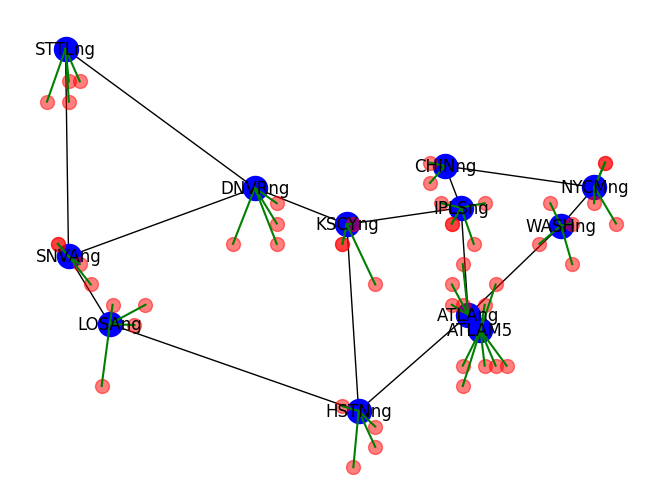

In [5]:
from scipy.spatial.distance import euclidean
import random
import networkx as nx
import matplotlib.pyplot as plt

# ... (other functions you've already defined) ...

# Function to find the nearest AP for a given user position
def find_nearest_ap(G, user_pos):
    min_distance = float('inf')
    nearest_ap = None
    nearest_pos = None

    for ap, pos in nx.get_node_attributes(G, 'pos').items():
        distance = euclidean(user_pos, pos)
        if distance < min_distance:
            min_distance = distance
            nearest_ap = ap
            nearest_pos = pos

    return nearest_ap, nearest_pos

# Updated create_users function to track user connections
def create_users(G, G_users, nodes, NoOfUsers):
    user_connections = []
    user_count = 0
    user_to_node_map = {}  # Dictionary to store user_id to node_id association

    while user_count < NoOfUsers:
        for node in nodes:
            node_id = nodes[node].get("id")
            x_cor = nodes[node].get("x_cor")
            y_cor = nodes[node].get("y_cor")
            randx = int(random.uniform(x_cor - 2.5, x_cor + 2.5))
            randy = int(random.uniform(y_cor - 2.5, y_cor + 2.5))

            user_pos = (randx, randy)
            nearest_ap, nearest_pos = find_nearest_ap(G, user_pos)

            user_id = "user_" + str(user_count)
            G_users.add_node(user_id, pos=user_pos)
            user_connections.append((user_pos, nearest_pos))

            # Store the association in the dictionary
            user_to_node_map[user_id] = nearest_ap

            user_count += 1
            if user_count >= NoOfUsers:
                break

    return user_connections, user_to_node_map

# (rest of the existing code)

# ...
# Create a new graph for users and call create_users
G_users = nx.Graph()

user_connections, user_to_node_map = create_users(G, G_users, nodes, NoOfUsers)

# Print the user_id to node_id association
print("User to Node Association:")
for user_id, node_id in user_to_node_map.items():
    print(f"{user_id} is associated with {node_id}")

# Draw the graphs and user connections
pos_G = nx.get_node_attributes(G, 'pos')
pos_G_users = nx.get_node_attributes(G_users, 'pos')

nx.draw(G, pos_G, with_labels=True, node_size=300, style="solid", node_color="blue")
nx.draw(G_users, pos_G_users, with_labels=False, node_size=100, style="dashed", node_color="red", alpha=0.5)

# Draw the connections between users and APs
for user_pos, ap_pos in user_connections:
    plt.plot([user_pos[0], ap_pos[0]], [user_pos[1], ap_pos[1]], color="green", linestyle="-")

plt.show()



# Assign Server Properties to each node in a uniform manner


In [6]:
# Function to associate edge devices with their attributes
def associate_edge_devices(G):
    for node in G.nodes():
        G.nodes[node]["name"] = "Cisco HyperFlex HX220c Edge M5"
        G.nodes[node]["formFactor"] = 16408
        G.nodes[node]["architecture"] = "x86"
        G.nodes[node]["cpu"] = "81.2GHz"
        G.nodes[node]["memory"] = "3TB"
        G.nodes[node]["storage"] = "30TB"
        G.nodes[node]["source"] = "Edge_Device_Cisco_HX220"

# Call the function to update the attributes of the edge devices in the graph
associate_edge_devices(G)

# Debug to print
for node, attrs in G.nodes(data=True):
    print(f"Node: {node}")
    for attr_key, attr_value in attrs.items():
        print(f"  {attr_key}: {attr_value}")
    print()


Node: ATLAM5
  pos: (-84.3833, 33.75)
  name: Cisco HyperFlex HX220c Edge M5
  formFactor: 16408
  architecture: x86
  cpu: 81.2GHz
  memory: 3TB
  storage: 30TB
  source: Edge_Device_Cisco_HX220

Node: ATLAng
  pos: (-85.5, 34.5)
  name: Cisco HyperFlex HX220c Edge M5
  formFactor: 16408
  architecture: x86
  cpu: 81.2GHz
  memory: 3TB
  storage: 30TB
  source: Edge_Device_Cisco_HX220

Node: CHINng
  pos: (-87.6167, 41.8333)
  name: Cisco HyperFlex HX220c Edge M5
  formFactor: 16408
  architecture: x86
  cpu: 81.2GHz
  memory: 3TB
  storage: 30TB
  source: Edge_Device_Cisco_HX220

Node: DNVRng
  pos: (-105.0, 40.75)
  name: Cisco HyperFlex HX220c Edge M5
  formFactor: 16408
  architecture: x86
  cpu: 81.2GHz
  memory: 3TB
  storage: 30TB
  source: Edge_Device_Cisco_HX220

Node: HSTNng
  pos: (-95.517364, 29.770031)
  name: Cisco HyperFlex HX220c Edge M5
  formFactor: 16408
  architecture: x86
  cpu: 81.2GHz
  memory: 3TB
  storage: 30TB
  source: Edge_Device_Cisco_HX220

Node: IPLSng


# Assign Applications to users randomly to generate demand:



In [7]:
import json

# Function to associate user devices with their attributes
def associate_user_devices(G_users, traffic_json_path):
    # Load the JSON data from the Traffic.json file
    with open(traffic_json_path, "r") as file:
        traffic_data = json.load(file)
        
    traffic_statistics = traffic_data["trafficStatistics"]
    
    for user in G_users.nodes():
        random_stat = random.choice(traffic_statistics)
        
        G_users.nodes[user]["application"] = random_stat["application"]
        G_users.nodes[user]["bandwidth"] = sum(random_stat["bandwidth"]) / len(random_stat["bandwidth"])
        
        if isinstance(random_stat["latency"], list):
            G_users.nodes[user]["latency"] = sum(random_stat["latency"]) / len(random_stat["latency"])
        else:
            G_users.nodes[user]["latency"] = random_stat["latency"]
            
        G_users.nodes[user]["deviceDensity"] = random_stat["deviceDensity"]
        G_users.nodes[user]["source"] = random_stat["source"]

# Specify the path to Traffic.json
traffic_json_path = "Devices/Traffic.json"

# Call the function to update the attributes of the user devices in the graph
associate_user_devices(G_users, traffic_json_path)

# Debug to print
for node, attrs in G_users.nodes(data=True):
    print(f"Node: {node}")
    for attr_key, attr_value in attrs.items():
        if attr_key == "bandwidth":
            print(f"  {attr_key}: {attr_value} Mbps")
        elif attr_key == "latency":
            print(f"  {attr_key}: {attr_value} ms")
        elif attr_key == "deviceDensity":
            print(f"  {attr_key}: {attr_value} /km^2")
        else:
            print(f"  {attr_key}: {attr_value}")
    print()



Node: user_0
  pos: (-86, 32)
  application: Road Safety
  bandwidth: 0.005 Mbps
  latency: 55.0 ms
  deviceDensity: 3000 /km^2
  source: Schulz

Node: user_1
  pos: (-84, 32)
  application: City Surveillance
  bandwidth: 60.0 Mbps
  latency: 10 ms
  deviceDensity: 60 /km^2
  source: Munoz, Marabissi

Node: user_2
  pos: (-88, 40)
  application: Structural Health
  bandwidth: 75.0 Mbps
  latency: 10.5 ms
  deviceDensity: 60000 /km^2
  source: Marabissi

Node: user_3
  pos: (-103, 40)
  application: Structural Health
  bandwidth: 75.0 Mbps
  latency: 10.5 ms
  deviceDensity: 60000 /km^2
  source: Marabissi

Node: user_4
  pos: (-94, 29)
  application: Smart Grids
  bandwidth: 0.7505 Mbps
  latency: 10.5 ms
  deviceDensity: 6000 /km^2
  source: Schulz

Node: user_5
  pos: (-85, 38)
  application: Structural Health
  bandwidth: 75.0 Mbps
  latency: 10.5 ms
  deviceDensity: 60000 /km^2
  source: Marabissi

Node: user_6
  pos: (-96, 39)
  application: Smart Grids
  bandwidth: 0.7505 Mbps
  

# Assign each application and its users to Containers (VNFs + Microservices)

In [8]:
import json
import networkx as nx

# Function to associate each application with its corresponding containers
def associate_app_with_containers(G_users, containers_json_path):
    # Load the JSON data from the containers.json file
    with open(containers_json_path, 'r') as f:
        containers_data = json.load(f)
        
    # Initialize dictionary to hold application-to-user mapping
    app_to_users = {}
    
    # Loop through each user and get their application
    for user, attrs in G_users.nodes(data=True):
        app = attrs['application']
        if app not in app_to_users:
            app_to_users[app] = []
        app_to_users[app].append(user)
    
    # Loop through each application in containers.json and associate with users
    for app_data in containers_data['Containers']:
        app_name = app_data['application']
        users = app_to_users.get(app_name, [])
        
        # If there are users associated with this app
        if users:
            print(f"Application: {app_name}")
            print("Users associated:", users)
            
            # Print containers in service chain order
            containers = app_data['vnfs'] + app_data['microservices']
            print("Containers to be used in order:", [c['name'] for c in containers])
            
            # Calculate and print total resource requirements
            total_cpu = sum(float(c['cpu']) for c in containers)
            total_mem = sum(float(c['memory']) for c in containers)
            total_storage = sum(float(c['storage']) for c in containers)
            
            print(f"Total CPU requirements: {total_cpu} GHz")
            print(f"Total Memory requirements: {total_mem} GB")
            print(f"Total Storage requirements: {total_storage} GB")
            print("---------------------------------------------------")
    return app_to_users, containers_data

# Specify the path to containers.json
containers_json_path = 'Devices/containers.json'

# Call the function
#associate_app_with_containers(G_users, containers_json_path)

app_to_users, containers_data = associate_app_with_containers(G_users, containers_json_path)




Application: Autonomous Traffic
Users associated: ['user_12', 'user_14', 'user_16', 'user_17', 'user_28', 'user_31', 'user_40', 'user_44']
Containers to be used in order: ['Traffic Management', 'Data Analytics', 'Traffic Routing', 'Vehicle Tracking', 'Traffic Light Control', 'Emergency Vehicle Priority']
Total CPU requirements: 10.0 GHz
Total Memory requirements: 21.0 GB
Total Storage requirements: 21.0 GB
---------------------------------------------------
Application: Road Safety
Users associated: ['user_0', 'user_21', 'user_22']
Containers to be used in order: ['Accident Detection', 'Emergency Alert', 'Safety Protocol', 'Alert Notification']
Total CPU requirements: 4.5 GHz
Total Memory requirements: 6.5 GB
Total Storage requirements: 7.5 GB
---------------------------------------------------
Application: City Surveillance
Users associated: ['user_1', 'user_7', 'user_8', 'user_9', 'user_29', 'user_37', 'user_46', 'user_47', 'user_49']
Containers to be used in order: ['Video Analytics

# Random Microservice Placement + Routing

In [9]:
from collections import defaultdict
import random
import networkx as nx

# Initialize data structures to hold server and link states
server_utilization = defaultdict(lambda: {'cpu': 0.0, 'memory': 0.0, 'storage': 0.0})  # in GHz, GB, GB
link_utilization = defaultdict(float)  # in Mbps
total_routing_cost = 0.0

# Function to convert string capacity to float (e.g., '3TB' to 3000.0)
def convert_capacity_to_float(capacity_str):
    if 'GHz' in capacity_str:
        return float(capacity_str.replace('GHz', ''))
    elif 'TB' in capacity_str:
        return float(capacity_str.replace('TB', '')) * 1000  # Convert TB to GB
    else:
        return float(capacity_str)

# Function to find a path that can handle the given bandwidth
def find_feasible_path(G, source, target, bandwidth):
    for path in nx.all_simple_paths(G, source=source, target=target, cutoff=10):  # cutoff is optional, for performance
        can_use_path = True
        for i in range(len(path) - 1):
            link = (path[i], path[i + 1])
            link_capacity = G[path[i]][path[i + 1]]['capacity']  # Assuming capacity is in Mbps
            if link_utilization[link] + bandwidth > link_capacity:
                can_use_path = False
                break
        if can_use_path:
            return path
    return None


accepted_users_count = 0
rejected_users_count = 0

# Random Microservice Placement
for app_name, users in app_to_users.items():
    # Select a random server (node) for this application
    server = random.choice(list(G.nodes()))
    
    # Get the total resource requirements for this application
    container_list = [c for c in containers_data['Containers'] if c['application'] == app_name]
    if container_list:
        containers = container_list[0]
    else:
        print(f"No containers found for the application {app_name}")
        continue  # or handle this case appropriately

    total_cpu = sum(float(c['cpu']) for c in containers['vnfs'] + containers['microservices'])
    total_mem = sum(float(c['memory']) for c in containers['vnfs'] + containers['microservices'])
    total_storage = sum(float(c['storage']) for c in containers['vnfs'] + containers['microservices'])
    
    # Check server capacity and update server utilization
    server_capacity = G.nodes[server]
    if server_utilization[server]['cpu'] + total_cpu <= convert_capacity_to_float(server_capacity['cpu']) and \
       server_utilization[server]['memory'] + total_mem <= convert_capacity_to_float(server_capacity['memory']) and \
       server_utilization[server]['storage'] + total_storage <= convert_capacity_to_float(server_capacity['storage']):
        server_utilization[server]['cpu'] += total_cpu
        server_utilization[server]['memory'] += total_mem
        server_utilization[server]['storage'] += total_storage
    else:
        print(f"Server capacity exceeded for server {server}")
        continue

    # Routing and link utilization
    for user in users:
        source_node = user_to_node_map[user]
        bandwidth = G_users.nodes[user]['bandwidth']
        path = find_feasible_path(G, source=source_node, target=server, bandwidth=bandwidth)
        
        if path:
            # Update link utilization and total routing cost along this path
            for i in range(len(path) - 1):
                link = (path[i], path[i + 1])
                link_utilization[link] += bandwidth
                total_routing_cost += G[path[i]][path[i + 1]]['cost']
                accepted_users_count += 1
        else:
            print(f"Could not find feasible path for user {user}")
            rejected_users_count += 1

# Print server and link utilization
print("Server Utilization:")
for server, util in server_utilization.items():
    print(f"Server {server}: CPU = {util['cpu']} GHz, Memory = {util['memory']} GB, Storage = {util['storage']} GB")
    
print("\nLink Utilization:")
for link, bandwidth in link_utilization.items():
    print(f"Link {link}: {bandwidth} Mbps")

# Print total routing cost
print(f"\nTotal Routing Cost: {total_routing_cost}")

#Print total accepted users
print(f"\nTotal Accepted Users: {accepted_users_count}")
accepted_percentage = accepted_users_count/NoOfUsers*100
print(f"\nPercentage of Accepted Users: {accepted_percentage}%")


#Print total rejected users
print(f"\nTotal Rejected Users: {rejected_users_count}")
rejected_percentage = rejected_users_count/NoOfUsers*100
print(f"\nPercentage of Rejected Users: {rejected_percentage}%")


Could not find feasible path for user user_30
Could not find feasible path for user user_24
Could not find feasible path for user user_25
Could not find feasible path for user user_32
Server Utilization:
Server WASHng: CPU = 4.5 GHz, Memory = 6.5 GB, Storage = 7.5 GB
Server HSTNng: CPU = 16.0 GHz, Memory = 44.0 GB, Storage = 94.0 GB
Server KSCYng: CPU = 5.0 GHz, Memory = 8.0 GB, Storage = 18.0 GB
Server NYCMng: CPU = 8.5 GHz, Memory = 12.5 GB, Storage = 14.5 GB
Server CHINng: CPU = 10.0 GHz, Memory = 21.0 GB, Storage = 21.0 GB
Server ATLAM5: CPU = 3.5 GHz, Memory = 4.5 GB, Storage = 4.5 GB

Link Utilization:
Link ('ATLAM5', 'ATLAng'): 1140.0300000000002 Mbps
Link ('ATLAng', 'HSTNng'): 5595.054999999999 Mbps
Link ('HSTNng', 'KSCYng'): 235.055 Mbps
Link ('KSCYng', 'IPLSng'): 10.055 Mbps
Link ('IPLSng', 'CHINng'): 43.166999999999994 Mbps
Link ('CHINng', 'NYCMng'): 13.017 Mbps
Link ('NYCMng', 'WASHng'): 0.015 Mbps
Link ('SNVAng', 'DNVRng'): 1060.7555 Mbps
Link ('DNVRng', 'KSCYng'): 2425.76

# Ploting Random Microservice Placement

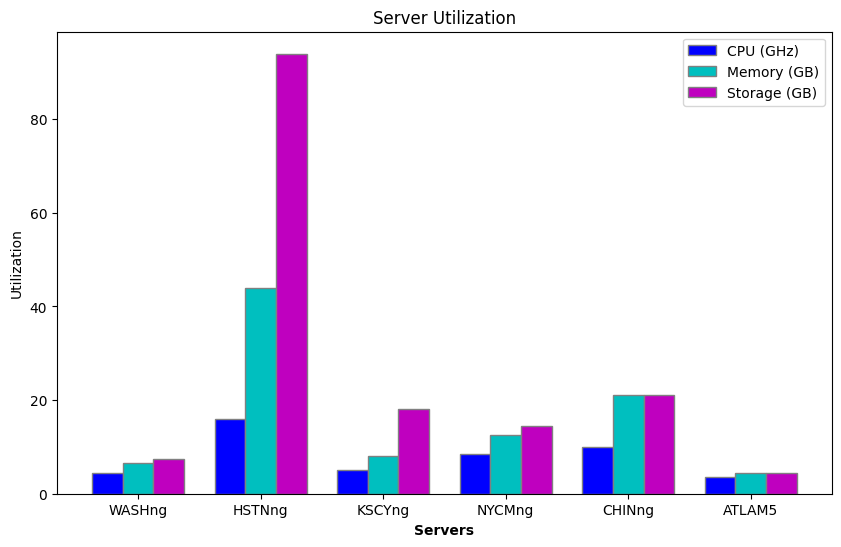

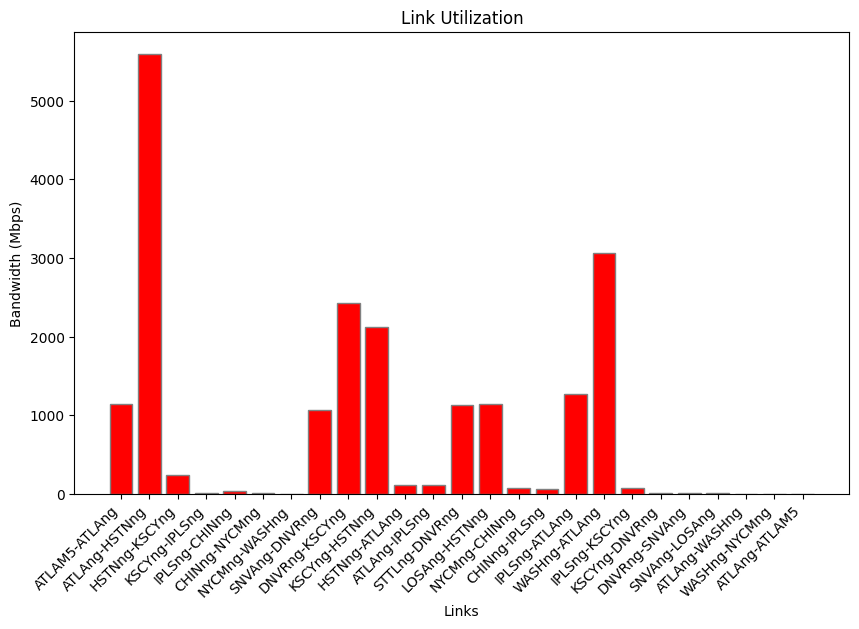

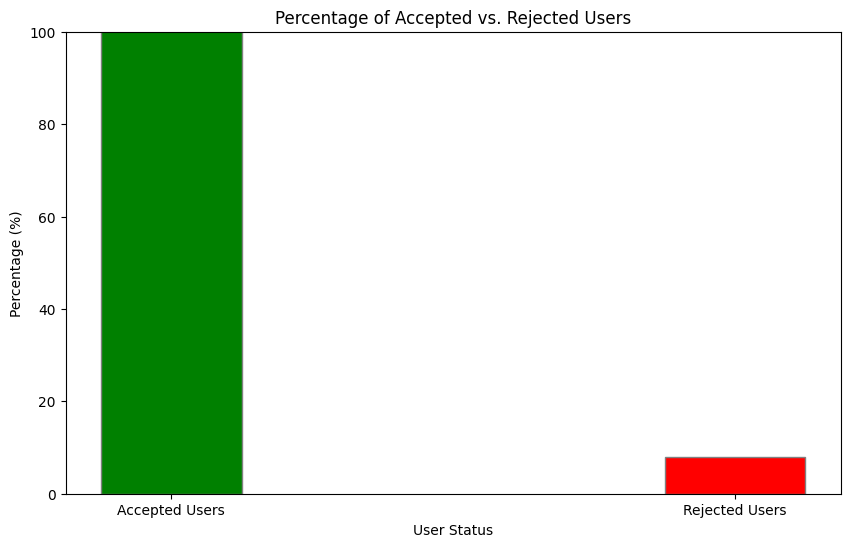

In [10]:
import matplotlib.pyplot as plt
import numpy as np


# Server Utilization Bar Graph
servers = list(server_utilization.keys())
cpu_util = [server_utilization[s]['cpu'] for s in servers]
mem_util = [server_utilization[s]['memory'] for s in servers]
storage_util = [server_utilization[s]['storage'] for s in servers]

barWidth = 0.25
r1 = np.arange(len(cpu_util))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(r1, cpu_util, color='b', width=barWidth, edgecolor='grey', label='CPU (GHz)')
plt.bar(r2, mem_util, color='c', width=barWidth, edgecolor='grey', label='Memory (GB)')
plt.bar(r3, storage_util, color='m', width=barWidth, edgecolor='grey', label='Storage (GB)')

plt.xlabel('Servers', fontweight='bold')
plt.ylabel('Utilization')
plt.title('Server Utilization')
plt.xticks([r + barWidth for r in range(len(cpu_util))], servers)

plt.legend()
plt.show()

#**********************************************************************************************************************

# Link Utilization Bar Graph
links = list(link_utilization.keys())
bandwidth_util = [link_utilization[l] for l in links]
link_names = [f"{l[0]}-{l[1]}" for l in links]

plt.figure(figsize=(10, 6))
plt.bar(link_names, bandwidth_util, color='r', edgecolor='grey')

plt.xlabel('Links')
plt.ylabel('Bandwidth (Mbps)')
plt.title('Link Utilization')
plt.xticks(rotation=45, ha='right')
plt.show()


#**********************************************************************************************************************

# Create a new figure for Accepted and Rejected Users
y_max = 100  # Adjust this value as needed

# Create a new figure for Accepted and Rejected Users
plt.figure(figsize=(10, 6))

# Bar positions for Accepted and Rejected Users
r4 = [x + barWidth for x in r3]

user_percentages = [accepted_percentage, rejected_percentage]
user_labels = ['Accepted Users', 'Rejected Users']

# Set the bar positions at the center of the ticks
bar_positions = [r + barWidth / 2 for r in r4[:2]]

plt.bar(bar_positions, user_percentages, color=['g', 'r'], width=barWidth, edgecolor='grey')
plt.xlabel('User Status')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Accepted vs. Rejected Users')

# Set the x-axis ticks at the center of the bars
plt.xticks(bar_positions, user_labels)

# Set the y-axis limit slightly above 100%
plt.ylim(0, y_max)

plt.show()

# Placement using Page Rank in Descending page rank order


In [11]:
from collections import defaultdict
import random
import networkx as nx
import pandas as pd

# Initialize data structures to hold server and link states
server_utilization = defaultdict(lambda: {'cpu': 0.0, 'memory': 0.0, 'storage': 0.0})  # in GHz, GB, GB
link_utilization = defaultdict(float)  # in Mbps
total_routing_cost = 0.0

# Page Rank Weights
# Replace this with your actual PageRank data
pagerank_df = PageRank.compute_pagerank(G)
sorted_pagerank = pagerank_df.sort_values(by='value', ascending=False)

# Function to convert string capacity to float (e.g., '3TB' to 3000.0)
def convert_capacity_to_float(capacity_str):
    if 'GHz' in capacity_str:
        return float(capacity_str.replace('GHz', ''))
    elif 'TB' in capacity_str:
        return float(capacity_str.replace('TB', '')) * 1000  # Convert TB to GB
    else:
        return float(capacity_str)

# Function to find a path that can handle the given bandwidth
def find_feasible_path(G, source, target, bandwidth):
    for path in nx.all_simple_paths(G, source=source, target=target, cutoff=50):  # cutoff is optional, for performance
        can_use_path = True
        for i in range(len(path) - 1):
            link = (path[i], path[i + 1])
            link_capacity = G[path[i]][path[i + 1]]['capacity']  # Assuming capacity is in Mbps
            if link_utilization[link] + bandwidth > link_capacity:
                can_use_path = False
                break
        if can_use_path:
            return path
    return None

# Microservice Placement using PageRank
for app_name, users in app_to_users.items():
    for _, row in sorted_pagerank.iterrows():
        server = row['name']
        
        # Get the total resource requirements for this application
        container_list = [c for c in containers_data['Containers'] if c['application'] == app_name]
        if container_list:
            containers = container_list[0]
        else:
            print(f"No containers found for the application {app_name}")
            break

        total_cpu = sum(float(c['cpu']) for c in containers['vnfs'] + containers['microservices'])
        total_mem = sum(float(c['memory']) for c in containers['vnfs'] + containers['microservices'])
        total_storage = sum(float(c['storage']) for c in containers['vnfs'] + containers['microservices'])
        
        # Check server capacity
        server_capacity = G.nodes[server]
        if server_utilization[server]['cpu'] + total_cpu <= convert_capacity_to_float(server_capacity['cpu']) and \
           server_utilization[server]['memory'] + total_mem <= convert_capacity_to_float(server_capacity['memory']) and \
           server_utilization[server]['storage'] + total_storage <= convert_capacity_to_float(server_capacity['storage']):
            
            # Update server utilization
            server_utilization[server]['cpu'] += total_cpu
            server_utilization[server]['memory'] += total_mem
            server_utilization[server]['storage'] += total_storage
            break
        else:
            continue  # Move to next highest PageRank server

    # Routing and link utilization
    for user in users:
        source_node = user_to_node_map[user]
        bandwidth = G_users.nodes[user]['bandwidth']
        path = find_feasible_path(G, source=source_node, target=server, bandwidth=bandwidth)
        
        if path:
            # Update link utilization and total routing cost along this path
            for i in range(len(path) - 1):
                link = (path[i], path[i + 1])
                link_utilization[link] += bandwidth
                total_routing_cost += G[path[i]][path[i + 1]]['cost']
        else:
            print(f"Could not find feasible path for user {user}")

# Print server and link utilization
print("Server Utilization:")
for server, util in server_utilization.items():
    print(f"Server {server}: CPU = {util['cpu']} GHz, Memory = {util['memory']} GB, Storage = {util['storage']} GB")
    
print("\nLink Utilization:")
for link, bandwidth in link_utilization.items():
    print(f"Link {link}: {bandwidth} Mbps")

# Print total routing cost
print(f"\nTotal Routing Cost: {total_routing_cost}")


#Print total accepted users
print(f"\nTotal Accepted Users: {accepted_users_count}")
accepted_percentage = accepted_users_count/NoOfUsers*100
print(f"\nPercentage of Accepted Users: {accepted_percentage}%")


#Print total rejected users
print(f"\nTotal Rejected Users: {rejected_users_count}")
rejected_percentage = rejected_users_count/NoOfUsers*100
print(f"\nPercentage of Rejected Users: {rejected_percentage}%")


Could not find feasible path for user user_37
Could not find feasible path for user user_49
Could not find feasible path for user user_17
Could not find feasible path for user user_13
Server Utilization:
Server ATLAng: CPU = 47.5 GHz, Memory = 96.5 GB, Storage = 159.5 GB

Link Utilization:
Link ('ATLAM5', 'ATLAng'): 1140.1310000000003 Mbps
Link ('SNVAng', 'DNVRng'): 1060.7555 Mbps
Link ('DNVRng', 'KSCYng'): 2425.7605 Mbps
Link ('KSCYng', 'HSTNng'): 2425.7605 Mbps
Link ('HSTNng', 'ATLAng'): 3663.112 Mbps
Link ('STTLng', 'DNVRng'): 1135.005 Mbps
Link ('LOSAng', 'HSTNng'): 1221.526 Mbps
Link ('NYCMng', 'CHINng'): 70.0755 Mbps
Link ('CHINng', 'IPLSng'): 70.1765 Mbps
Link ('IPLSng', 'ATLAng'): 1285.2015000000004 Mbps
Link ('WASHng', 'ATLAng'): 3060.0 Mbps
Link ('KSCYng', 'DNVRng'): 81.501 Mbps
Link ('DNVRng', 'SNVAng'): 81.501 Mbps
Link ('SNVAng', 'LOSAng'): 81.501 Mbps

Total Routing Cost: 105392.0

Total Accepted Users: 156

Percentage of Accepted Users: 312.0%

Total Rejected Users: 4

P

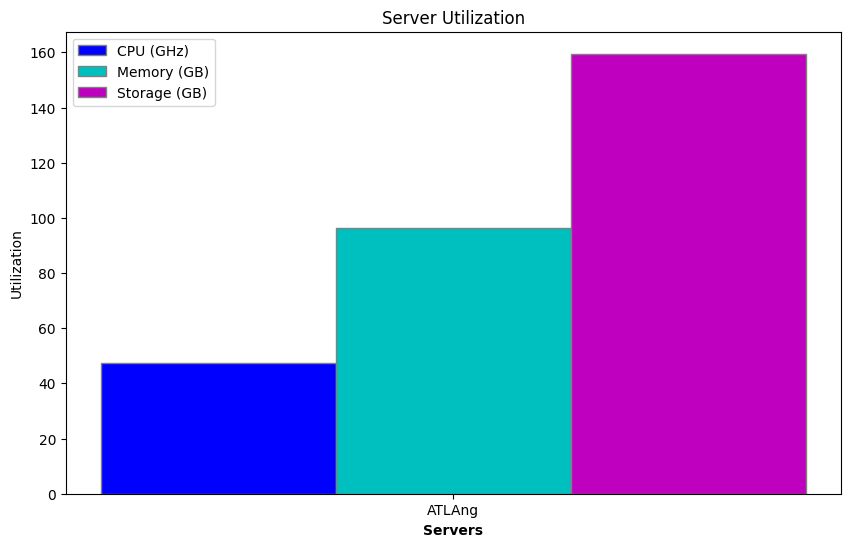

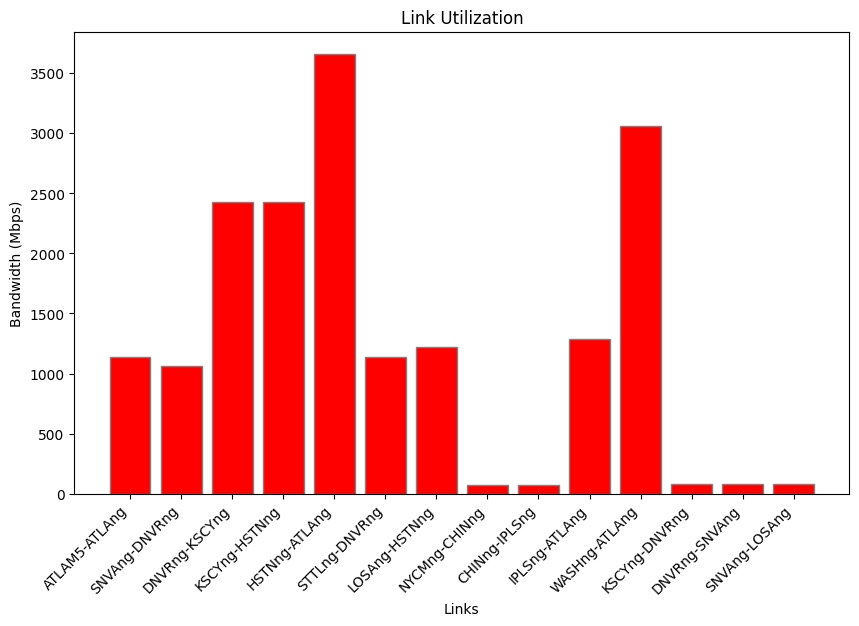

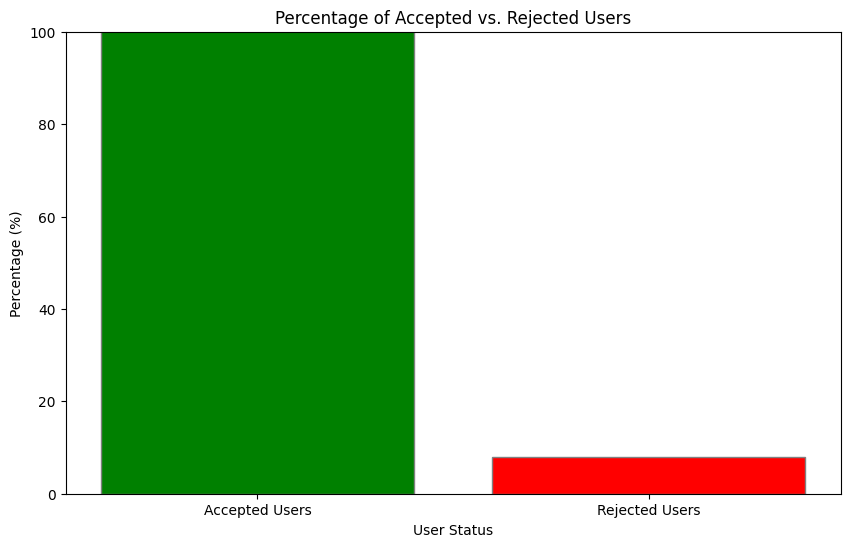

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have server_utilization, link_utilization, accepted_percentage, and rejected_percentage already defined

# Server Utilization Bar Graph
servers = list(server_utilization.keys())
cpu_util = [server_utilization[s]['cpu'] for s in servers]
mem_util = [server_utilization[s]['memory'] for s in servers]
storage_util = [server_utilization[s]['storage'] for s in servers]

barWidth = 0.25
r1 = np.arange(len(cpu_util))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(r1, cpu_util, color='b', width=barWidth, edgecolor='grey', label='CPU (GHz)')
plt.bar(r2, mem_util, color='c', width=barWidth, edgecolor='grey', label='Memory (GB)')
plt.bar(r3, storage_util, color='m', width=barWidth, edgecolor='grey', label='Storage (GB)')

plt.xlabel('Servers', fontweight='bold')
plt.ylabel('Utilization')
plt.title('Server Utilization')
plt.xticks([r + barWidth for r in range(len(cpu_util))], servers)

plt.legend()
plt.show()

# Link Utilization Bar Graph
links = list(link_utilization.keys())
bandwidth_util = [link_utilization[l] for l in links]
link_names = [f"{l[0]}-{l[1]}" for l in links]

plt.figure(figsize=(10, 6))
plt.bar(link_names, bandwidth_util, color='r', edgecolor='grey')

plt.xlabel('Links')
plt.ylabel('Bandwidth (Mbps)')
plt.title('Link Utilization')
plt.xticks(rotation=45, ha='right')
plt.show()

# Accepted vs Rejected Users Bar Graph
y_max = 100  # Adjust this value as needed

plt.figure(figsize=(10, 6))

user_percentages = [accepted_percentage, rejected_percentage]
user_labels = ['Accepted Users', 'Rejected Users']

bar_positions = np.arange(len(user_labels))

plt.bar(bar_positions, user_percentages, color=['g', 'r'], edgecolor='grey')

plt.xlabel('User Status')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Accepted vs. Rejected Users')
plt.xticks(bar_positions, user_labels)
plt.ylim(0, y_max)

plt.show()


# Adaptive VNF Placement Algorithm

1. *Determining Service Order Algorithm*: This algorithm takes several parameters like sets of users, SFCs, bandwidth requirements, and computational demands and times for CNFs. It calculates the urgency and criticality for each SFC and sorts them.
2. *Placement Algorithm*: For each application in the sorted Service Order Queue, it tries to place the most critical VNF on the Central_Server. If that's not possible, it calculates a Candidate score for each node and sorts them to find the next best candidate.
3. *Experimental Setup and Results*: You have graphs for the average number of servers used, SFC length, algorithm execution time, CPU utilization, and link utilization.

In [13]:
# Initialize server and link states
server_state = {}  # Format: {server_id: {'cpu_load': 0, 'memory_load': 0, 'storage_load': 0}}
link_state = {}  # Format: {link_id: {'bandwidth_used': 0}}

# Algorithm 2: Placement Algorithm
def placement_algorithm(sorted_sfcs, sorted_cnfs, central_servers, utilization_threshold):
    global server_state
    global link_state
    
    for app in sorted_sfcs:
        for vnf, _ in sorted_cnfs:
            host = central_servers.get(vnf, None)
            
            if host and server_state[host]['cpu_load'] < (100 - utilization_threshold):
                # Place VNF on host
                print(f"Placed VNF {vnf} on host {host}")
                server_state[host]['cpu_load'] += 10  # Update CPU load by 10% (placeholder)
                
                # Update link bandwidth (placeholder)
                # Assuming the link_id exists in link_state
                link_id = 'link1'  # Replace with actual link_id
                if link_id in link_state:
                    link_state[link_id]['bandwidth_used'] += 10  # Update link bandwidth by 10 Mbps
                
            else:
                # Find next best candidate to host VNF (placeholder)
                candidates = find_candidates(host)
                candidates = sorted(candidates, key=lambda x: x['score'])  # Sort ascending
                index = 0
                vnf_deployed = False
                
                while not vnf_deployed:
                    host = candidates[index]['host']
                    
                    if server_state[host]['cpu_load'] < (100 - utilization_threshold):
                        print(f"Placed VNF {vnf} on host {host}")
                        server_state[host]['cpu_load'] += 10  # Update CPU load by 10% (placeholder)
                        
                        # Update link bandwidth (placeholder)
                        link_id = 'link1'  # Replace with actual link_id
                        if link_id in link_state:
                            link_state[link_id]['bandwidth_used'] += 10  # Update link bandwidth by 10 Mbps
                        
                        vnf_deployed = True
                    else:
                        index += 1

# Placeholder function to find candidates based on some metrics
def find_candidates(current_node):
    # Implement the logic to find candidate nodes based on metrics like hops count, CPU load, etc.
    return [{'host': 'server2', 'score': 1}, {'host': 'server3', 'score': 2}]  # Example

# # Example usage
sorted_sfcs = [{'sfc': 'sfc1', 'criticality': 0.5}, {'sfc': 'sfc2', 'criticality': 0.6}]
sorted_cnfs = [('vnf1', 5), ('vnf2', 3)]
central_servers = {'vnf1': 'server1', 'vnf2': 'server1'}
server_state = {'server1': {'cpu_load': 50}, 'server2': {'cpu_load': 30}, 'server3': {'cpu_load': 20}}
link_state = {'link1': {'bandwidth_used': 40}}

utilization_threshold = 20  # Example threshold
placement_algorithm(sorted_sfcs, sorted_cnfs, central_servers, utilization_threshold)

# Print server and link utilization
print("\nServer Utilization:")
for server, util in server_state.items():
    print(f"{server}: CPU Load = {util['cpu_load']}%")

print("\nLink Utilization:")
for link, util in link_state.items():
    print(f"{link}: Bandwidth Used = {util['bandwidth_used']} Mbps")


Placed VNF vnf1 on host server1
Placed VNF vnf2 on host server1
Placed VNF vnf1 on host server1
Placed VNF vnf2 on host server2

Server Utilization:
server1: CPU Load = 80%
server2: CPU Load = 40%
server3: CPU Load = 20%

Link Utilization:
link1: Bandwidth Used = 80 Mbps


# End to End Wireless - Edge - Cloud

In [14]:
import numpy as np
import random
import cvxpy as cp

# Rayleigh fading channel condition for each sensor and time slot
def generate_channel_matrix(num_sensors, num_time_slots):
    # Independent identically distributed Rayleigh fading
    return np.abs(np.random.randn(num_time_slots, num_sensors))

# Helper function to calculate SNR based thresholds
def calculate_thresholds(target_BER):
    thresholds = [-2 / 3 * np.log(5 * target_BER) * (2 ** n - 1) for n in range(0, 5)]
    return 10 * np.log10(np.array(thresholds))

# Function to represent the energy efficiency of a device
def energy_efficiency(power_profile, snr, thresholds):
    # Placeholder function to calculate energy efficiency based on device profile, SNR, and thresholds
    # Implement your own model here
    return 0.9

# Number of sensors and time slots
N = 4
T = 20000

# Initial energy levels, randomized
initial_energy = np.random.uniform(50, 20000, N)

# Channel conditions matrix
H = generate_channel_matrix(N, T)

# SNR thresholds for adaptive modulation
thresholds = calculate_thresholds(1e-3)

# Decision variables
X = cp.Variable((T, N), boolean=True)  # Whether sensor s transmits at time t
E = cp.Variable((T, N), nonneg=True)  # Energy used by sensor s at time t
R = cp.Variable((T, N), nonneg=True)  # Rate of sensor s at time t
Y = cp.Variable(N, boolean=True)  # Device type (power hungry or not)

# Objective function and constraints
objective = cp.Maximize(cp.sum(Y) + cp.sum(R) + cp.sum(1 - E))
constraints = [
    # Add your constraints here based on the equations you provided
]

# Solve the problem
prob = cp.Problem(objective, constraints)
prob.solve()



# Initialize thresholds for different SNR levels
gamma = calculate_thresholds(1e-3)

# Energy consumption parameters for different SNR levels
alpha = np.array([0.1, 0.2, 0.3, 0.4])

# Rate parameters for different SNR levels
R_values = np.array([1, 2, 3, 4])

# Safety energy threshold
E_Th = np.max(initial_energy) / 2

# Objective function and constraints
objective = cp.Maximize(cp.sum(Y) + cp.sum(R) + cp.sum(1 - E))
constraints = []

# Adding constraints based on the equations
for t in range(T):
    for s in range(N):
        # Energy and Rate constraints based on channel conditions and SNR thresholds
        conditions = [
            (H[t, s] < gamma[0], 0),
            (H[t, s] >= gamma[3], alpha[0] * X[t, s]),
            (gamma[2] <= H[t, s], alpha[1] * X[t, s]),
            (gamma[1] <= H[t, s], alpha[2] * X[t, s]),
            (gamma[0] <= H[t, s], alpha[3] * X[t, s]),
        ]
        constraints.append(cp.switch(*conditions) == E[t, s])
        
        conditions = [
            (H[t, s] < gamma[0], 0),
            (gamma[3] <= H[t, s], R_values[3] * X[t, s]),
            (gamma[2] <= H[t, s], R_values[2] * X[t, s]),
            (gamma[1] <= H[t, s], R_values[1] * X[t, s]),
            (gamma[0] <= H[t, s], R_values[0] * X[t, s]),
        ]
        constraints.append(cp.switch(*conditions) == R[t, s])
        
        # Energy profile constraint
        constraints.append(Y[s] == 0 if initial_energy[s] - cp.sum(E[:, s]) < E_Th else 1)
        
        # Fairness constraint
        constraints.append(cp.sum(X[:, s]) <= T / N)

# At most one sensor should transmit if channel condition is above threshold
constraints.append(cp.sum(X, axis=1) == 1)

# Solve the problem
prob = cp.Problem(objective, constraints)
prob.solve()

# Output the results
print("Optimal value:", prob.value)
print("Optimal variable values:", X.value, E.value, R.value, Y.value)


ModuleNotFoundError: No module named 'cvxpy'